In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= np.load("/home/tizianobacaloni/GasRL/Time series/time_series_stats_27_4_20.npy",allow_pickle=True)
df=df.item()

In [3]:
prices=df["sac_model_1500000_pen1000.0_pen_thresh0.0_rep4.zip"]["price"]


# Computing 1st difference of log prices 
log_prices = np.log(prices)
prices = np.diff(log_prices, axis=1)

In [4]:
prices = np.array(prices**2)

sum_prices = np.sum(prices, axis=1) # For each of n_reps, the sum over max_test_steps (row sum): the result are n_reps single values

var_prices = (sum_prices) / prices.shape[1]   # Sample variance
std_prices = np.sqrt(var_prices)

mean_prices = np.mean(std_prices)             # Final volatility measure
std_std_prices = np.std(std_prices)

In [5]:
##### Equivalent way to compute volatility considering delta_price as defined in GasStorageEnv 

delta_prices=df["sac_model_1500000_pen1000.0_pen_thresh0.0_rep4.zip"]["delta price"]
delta_prices = np.array(delta_prices) 
sum_delta_prices = np.sum(delta_prices, axis=1) # For each of n_reps, the sum over max_test_steps (row sum): the result are n_reps single values
                
var_delta_prices = sum_delta_prices / delta_prices.shape[1]   # Sample variance
std_delta_prices = np.sqrt(var_delta_prices)

mean_std_delta_prices = np.mean(std_delta_prices)             # Final volatility measure
std_std_delta_prices = np.std(std_delta_prices)


In [6]:
print(f'Mean price volatility: {mean_prices}')
print(f'Mean delta price volatility: {mean_std_delta_prices} ')

Mean price volatility: 0.2385813444852829
Mean delta price volatility: 0.25110122561454773 


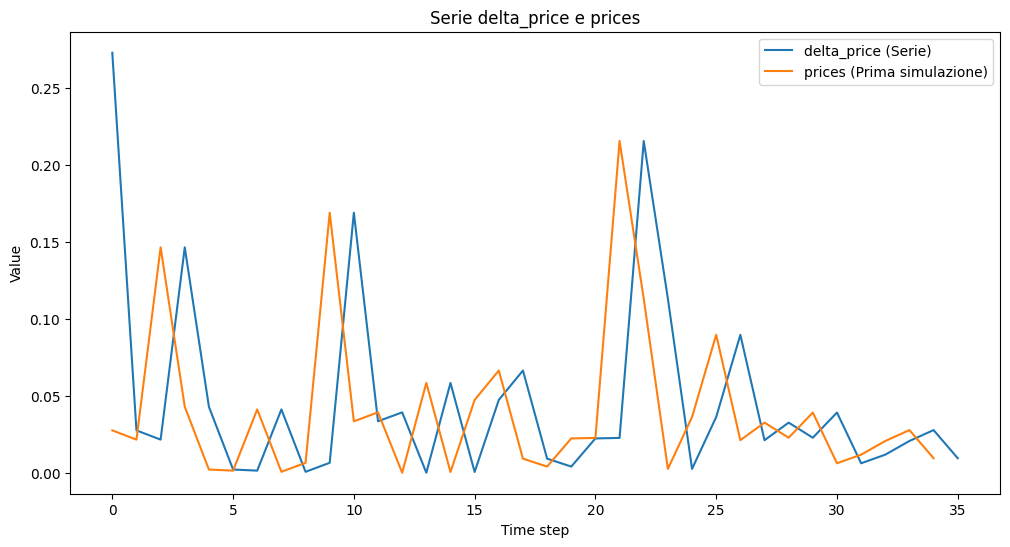

In [7]:
##### They are basically the same 

plt.figure(figsize=(12, 6))
plt.plot(delta_prices[0], label='delta_price (Serie)', color='tab:blue')
plt.plot(prices[0], label='prices (Prima simulazione)', color='tab:orange')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Serie delta_price e prices')
plt.legend()
plt.show()